Making Sales Forecats Using Regression Analysis
a) Linear Regression
b) Random Forest Regressor
c) XGBoost Regressor

In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [2]:
# Step 2: Import Dataset and check the dataset
sales_data = pd.read_csv("master_sales_data.csv")
sales_data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Day,Year,TimeStamp
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,December,1,2010,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,1,2010,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,December,1,2010,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,1,2010,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,1,2010,08:26:00
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,December,1,2010,08:26:00
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,December,1,2010,08:26:00
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,December,1,2010,08:28:00
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,December,1,2010,08:28:00
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,December,1,2010,08:34:00


In [3]:
#Step 3: check for null values & drop the null columns

sales_data = sales_data.drop(['InvoiceNo','StockCode','Description','Quantity','UnitPrice','CustomerID','Country','Month','Day','Year','TimeStamp'],axis=1)


In [4]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527792 entries, 0 to 527791
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceDate  527792 non-null  object 
 1   TotalPrice   527792 non-null  float64
dtypes: float64(1), object(1)
memory usage: 8.1+ MB


In [5]:
#Step 4: Converting the InvoiceDate to dateTime datatype

sales_data['InvoiceDate'] = pd.to_datetime(sales_data['InvoiceDate'])

In [6]:
sales_data.head(10)

,InvoiceDate,TotalPrice
0,2010-12-01 08:26:00,15.30
1,2010-12-01 08:26:00,20.34
2,2010-12-01 08:26:00,22.00
3,2010-12-01 08:26:00,20.34
4,2010-12-01 08:26:00,20.34
5,2010-12-01 08:26:00,15.30
6,2010-12-01 08:26:00,25.50
7,2010-12-01 08:28:00,11.10
8,2010-12-01 08:28:00,11.10
9,2010-12-01 08:34:00,54.08


In [7]:
# Step 5: Convert date to a month period and then sum the Totalprice in Each Month

sales_data['InvoiceDate'] = pd.to_datetime(sales_data['InvoiceDate']).dt.to_period('M')
monthly_sales = sales_data.groupby('InvoiceDate').sum().reset_index()
                                           

In [8]:
#Step 6: Convert InvoiceDate column to timestamp datatype

monthly_sales['InvoiceDate'] = monthly_sales['InvoiceDate'].dt.to_timestamp()

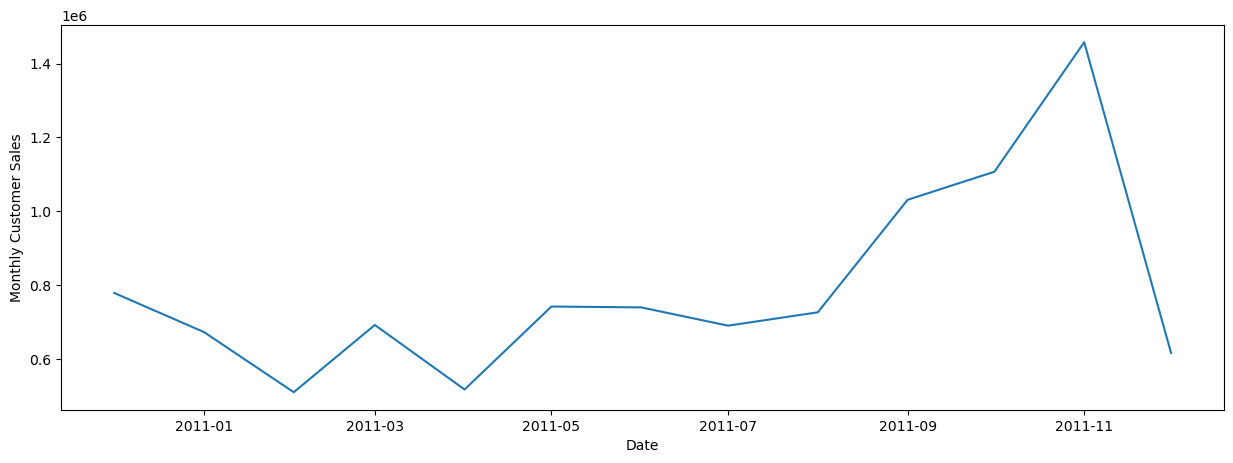

In [9]:
#Step 7: Visulization of the monthly sales data
plt.figure(figsize = (15,5))
plt.plot(monthly_sales['InvoiceDate'],monthly_sales['TotalPrice'])
plt.xlabel("Date")
plt.ylabel("Monthly Customer Sales")
plt.show()


In [11]:

# Extract time features
monthly_sales['Month'] = monthly_sales['InvoiceDate'].dt.month

# Prepare X (features) and y (target)
X = monthly_sales[['Month']]
y = monthly_sales['TotalPrice']

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions for future dates (assuming 'future_dates' is a DataFrame with future dates)
future_dates = pd.DataFrame(pd.date_range(start='2011-12-01', periods=12, freq='M'), columns=['InvoiceDate'])
future_dates['Month'] = future_dates['InvoiceDate'].dt.month

# Reshape the 'X' data to a 2D array before making predictions
X_future = future_dates[['Month']]

# Make predictions using the model
forecast = model.predict(X_future)

print(forecast)

[985710.02346535 562035.71762376 600551.56360936 639067.40959496
 677583.25558056 716099.10156616 754614.94755176 793130.79353735
 831646.63952295 870162.48550855 908678.33149415 947194.17747975]


In [12]:
# Create a new DataFrame for the forecast
forecast_df = pd.DataFrame({'InvoiceDate': future_dates['InvoiceDate'], 'Forecast': forecast})

# Concatenate the forecast DataFrame with the monthly_sales DataFrame
concatenated_df = pd.concat([monthly_sales, forecast_df], ignore_index=True)

print(concatenated_df)


   InvoiceDate  TotalPrice  Month       Forecast
0   2010-12-01   778010.91   12.0            NaN
1   2011-01-01   671992.41    1.0            NaN
2   2011-02-01   508952.87    2.0            NaN
3   2011-03-01   691265.94    3.0            NaN
4   2011-04-01   516339.79    4.0            NaN
5   2011-05-01   741275.74    5.0            NaN
6   2011-06-01   738876.88    6.0            NaN
7   2011-07-01   689397.74    7.0            NaN
8   2011-08-01   725605.16    8.0            NaN
9   2011-09-01  1030500.36    9.0            NaN
10  2011-10-01  1106719.54   10.0            NaN
11  2011-11-01  1457745.53   11.0            NaN
12  2011-12-01   615501.60   12.0            NaN
13  2011-12-31         NaN    NaN  985710.023465
14  2012-01-31         NaN    NaN  562035.717624
15  2012-02-29         NaN    NaN  600551.563609
16  2012-03-31         NaN    NaN  639067.409595
17  2012-04-30         NaN    NaN  677583.255581
18  2012-05-31         NaN    NaN  716099.101566
19  2012-06-30      

In [ ]:
# Step 8: Call the difference on the sales columns to make the sales data stationery

monthly_sales['sales_diff'] = monthly_sales['TotalPrice'].diff()
monthly_sales = monthly_sales.dropna()
monthly_sales.head(10)

In [ ]:
#Step 9: Visualize sales & Sales difference

plt.figure(figsize = (15,5))
plt.plot(monthly_sales['InvoiceDate'],monthly_sales['sales_diff'])
plt.xlabel("Date")
plt.ylabel("Sales Difference")
plt.show()

In [ ]:
#Step 10: We will drop the TotalPrice and InvoiceDate columns. We do this so that we will only be dealing with stationery
#sales data. The stationery sales data will be use to train the machine learning model as well as the reinforcement learning model.

supervised_data = monthly_sales.drop(['InvoiceDate','TotalPrice'], axis=1)
supervised_data.head(20)

In [ ]:
# Step 11: Preparing the supervised data. The previous 13 months TotalPrice will act as input features and the next 13 months
# TotalPrice will be used as output features for supervised learning model

#for i in range(1, 13):
    #col_name = 'month_' + str(i)
    #supervised_data[col_name] = supervised_data['sales_diff'].shift(i)
# Concatenate 'supervise_data' DataFrame with the 'sales_diff' Series along the columns
supervised_data = pd.concat([supervised_data, sales_diff], axis=1)

print(supervised_data.head(15))

